In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import seaborn as sns

In [2]:
data = load_boston()

In [3]:
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df['Target'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# To have a basic understanding of any continuous variable,we can just do .describe()

df['Target'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: Target, dtype: float64

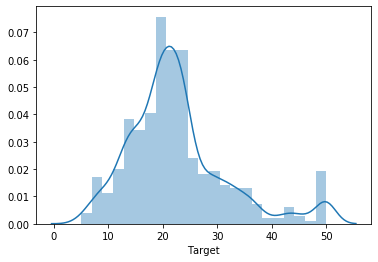

In [6]:
sns.distplot(df['Target'])

In [8]:
df.corr().loc['Target',:]

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Target     1.000000
Name: Target, dtype: float64

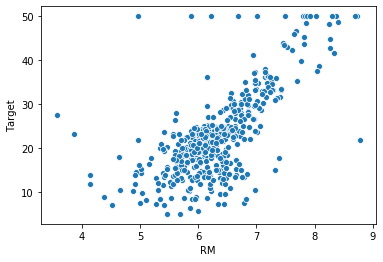

In [9]:
# If you look closely,RM has a positive corr of 0.69 with target
# So ideally if we increase RM,target should increase as well. Lets plot to see this

sns.scatterplot(df['RM'],df['Target'])

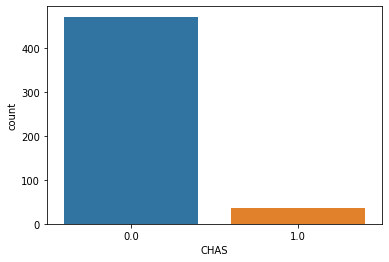

In [25]:
# To check the counts of categories of a column,we use countplot

sns.countplot(x ='CHAS',data=df)

In [20]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [16]:
# Binning of age column on quantiles

df['Age_bins'],bins = pd.qcut(df['AGE'],q=4,labels=['Age_1','Age_2','Age_3','Age_4'],retbins=True)
df['Age_bins'].head()

0    Age_2
1    Age_3
2    Age_2
3    Age_2
4    Age_2
Name: Age_bins, dtype: category
Categories (4, object): ['Age_1' < 'Age_2' < 'Age_3' < 'Age_4']

In [17]:
# If you want to see the ranges of the bins you can set retbins to True
bins

array([  2.9  ,  45.025,  77.5  ,  94.075, 100.   ])

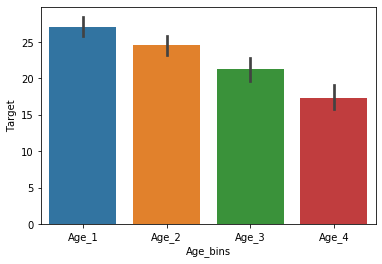

In [18]:
# We can use barplot to see relation between a categorical and continuos variable

sns.barplot(x='Age_bins',y='Target',data=df)

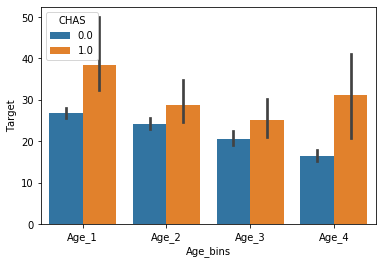

In [19]:
# We can add a third column(categorical) as a hue parameter to find even deeper trends

sns.barplot(x='Age_bins',y='Target',hue='CHAS',data=df)

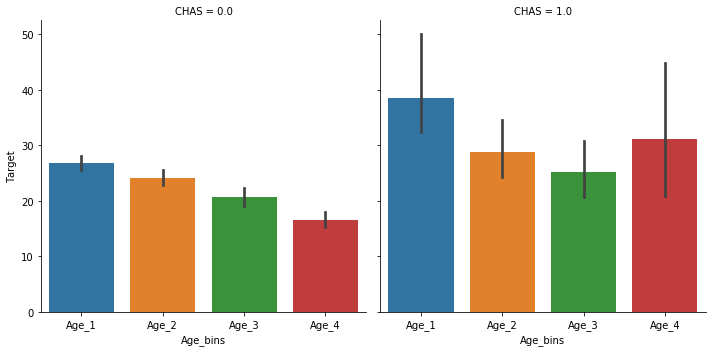

In [21]:
# In order to see multiple cases as different independent plots,use catplot to plot two things separately
# Here we have two bar plots one for chas=0 and other for chas = 1

sns.catplot(x='Age_bins',y='Target',kind='bar',col='CHAS',data=df)

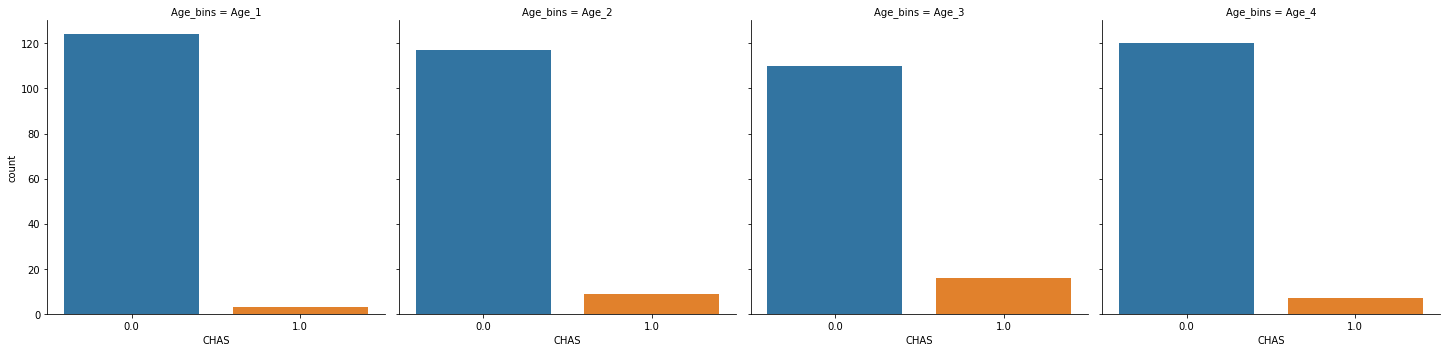

In [24]:
sns.catplot(x='CHAS',kind='count',col='Age_bins',data=df)